For documentation reference

https://scikit-learn.org/stable/index.html

# PROBLEM STATEMENT

Predicting the Spending Score of Mall Customers.

**Features:**
* CustomerID
* Gender
* Age
* Annual Income(k$)

**Target:**
* Spending Score(1-100)

In [3]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [4]:
# Loading the dataset
dataset=pd.read_csv('https://raw.githubusercontent.com/s4sauravv/Datasets/main/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X =dataset[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
# standardizing the dataset
X = StandardScaler().fit_transform(X)
X[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [7]:
# Build DB Scan
db = DBSCAN(eps=0.4, min_samples=4).fit(X)

In [8]:
labels = db.labels_
print (labels)

[ 0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  1  0  1  2  1  2  1  0  1  2  1  2  1  2  1  2  1  0  1
  2  1  0  1  2  1  2  1  2  1  2  1  2  1  2  1  0  1  2  1  2  1  2  1
  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1 -1  1  2 -1  2  1  2 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [9]:
len(set(labels))

4

In [10]:
1 if -1 in labels else 0

1

In [11]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is noise on DBScan
n_noise_ = list(labels).count(-1)  # n_noise_ the number of noises (-1)

In [12]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 14


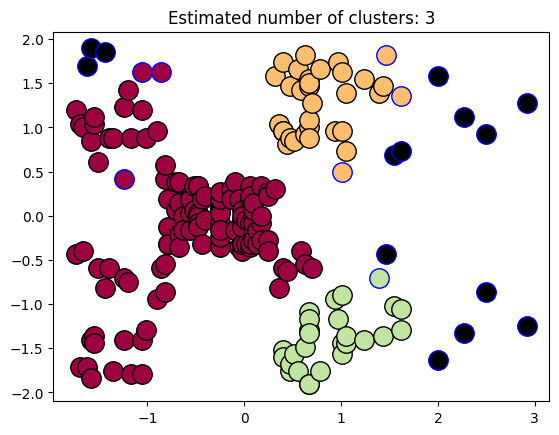

In [13]:


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  # creating an array of true and false as the same size as db.labels

core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True


import matplotlib.pyplot as plt

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):


    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)   # assigning class members for each class


    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)


    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='b', markersize=14)



plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [14]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2]), array([ 14, 126,  33,  27]))

In [15]:
noises = X[labels == -1]

print (noises)

[[-1.62449091  1.70038436]
 [-1.58632148  1.89449216]
 [-1.43364376  1.8556706 ]
 [ 1.46723286 -0.43480148]
 [ 1.54357172  0.69102378]
 [ 1.61991057  0.72984534]
 [ 2.00160487 -1.63826986]
 [ 2.00160487  1.58391968]
 [ 2.26879087 -1.32769738]
 [ 2.26879087  1.11806095]
 [ 2.49780745 -0.86183865]
 [ 2.49780745  0.92395314]
 [ 2.91767117 -1.25005425]
 [ 2.91767117  1.27334719]]


This noises will be taken for the analysis